In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
cycol = cycle('bgrcmk')

In [20]:
def read_exp_res(exp_name):
    control_val = pd.read_csv('results/{0}/control_val_results.csv'.format(exp_name))
    utility_val = pd.read_csv('results/{0}/utility_classifier_val_results.csv'.format(exp_name))
    control_test = pd.read_csv('results/{0}/control_test_results.csv'.format(exp_name))
    utility_test = pd.read_csv('results/{0}/utility_classifier_test_results.csv'.format(exp_name))
    similarity_test = pd.read_csv('results/{0}/utility_similarity_test_results.csv'.format(exp_name))
    return control_val, utility_val, control_test, utility_test, similarity_test

In [21]:
def show_exp_res_tables(exp_name, df1, df2, df3, df4, df5, utility_metric, privacy_loss_metric):
    display("Ctrl Val", df1, "Ctrl Test", df3, "Utility Val", df2, "Utility Test", df4, "Sim Test", df5)
    df_acc = df4[['eps', utility_metric]]
    display("Test " + utility_metric, df_acc)

    df_loss = df5[df5['metric'] == privacy_loss_metric]
    display("All " + privacy_loss_metric, df_loss)

    df_loss_metric = df_loss[['eps', 'mean_all']]
    display("Mean " + privacy_loss_metric, df_loss_metric) 

In [22]:
def plot_exp_res(exp_name, df1, df2, df3, df4, df5, utility_metric, privacy_loss_metric):
    df_u = df4[['eps', utility_metric]]
    df_loss = df5[df5['metric'] == privacy_loss_metric]
    df_loss_metric = df_loss[['eps', 'mean_all']]

    x_u = df_u['eps']
    x_l = df_loss_metric['eps']
    y_u = df_u[utility_metric]
    y_l = df_loss_metric['mean_all']
    no_dp_legend = []
    if x_u[0] == "no_dp":
        x_u = x_u[1:]
        x_l = x_l[1:]
        x_u = np.array(x_u, dtype=float)
        x_l = np.array(x_l, dtype=float)
        plt.hlines(y_u[0], min(x_l), max(x_u), linestyle="dashed", colors=next(cycol))
        plt.hlines(y_l[0], min(x_l), max(x_u), linestyle="dashed", colors=next(cycol))
        no_dp_legend = [exp_name + "_gen_no_dp_" + utility_metric, exp_name + "_gen_no_dp_" + privacy_loss_metric]
        y_u = y_u[1:]
        y_l = y_l[1:]
    
    x_u = np.array(x_u, dtype=int)
    x_l = np.array(x_l, dtype=int)

    plt.plot(x_u, y_u, color=next(cycol))
    plt.plot(x_l, y_l, color=next(cycol))
    plt.xlabel("eps")
    return [exp_name + "_" + utility_metric, exp_name + "_" + privacy_loss_metric] + no_dp_legend



In [23]:
def process_res(exp_name, show_tables=False, utility_metric="acc", privacy_loss_metric = "hamming"):
    tables = read_exp_res(exp_name)
    if show_tables:
        show_exp_res_tables(exp_name, *tables, utility_metric, privacy_loss_metric)
    legend = plot_exp_res(exp_name, *tables, utility_metric, privacy_loss_metric)
    return legend

'deeplog2_a'

'Ctrl Val'

,date,threshold,tn,fp,fn,tp,acc
0,1.622927e+09,0.500000,840,0,840,0,0.500000
1,1.622927e+09,-29.171588,625,215,113,727,0.804762


'Ctrl Test'

,date,threshold,tn,fp,fn,tp,acc
0,1.622927e+09,0.500000,1200,0,1200,0,0.500000
1,1.622927e+09,-29.171588,905,295,165,1035,0.808333


'Utility Val'

,date,iter,eps,threshold,tn,fp,fn,tp,acc
0,1.622940e+09,0,20,-66.436228,292,548,63,777,0.636310
1,1.622940e+09,1,30,-66.510004,327,513,50,790,0.664881
2,1.622941e+09,2,40,-37.670768,491,349,78,762,0.745833
3,1.622941e+09,3,50,-43.323731,484,356,53,787,0.756548


'Utility Test'

,date,iter,eps,threshold,tn,fp,fn,tp,acc
0,1.622940e+09,0,20,-66.436228,403,797,95,1105,0.628333
1,1.622940e+09,1,30,-66.510004,455,745,74,1126,0.658750
2,1.622941e+09,2,40,-37.670768,683,517,117,1083,0.735833
3,1.622941e+09,3,50,-43.323731,693,507,72,1128,0.758750


'Sim Test'

,date,iter,eps,metric,mean_normal,mean_abnormal,mean_all
0,1.622940e+09,0,20,hamming,0.482542,0.428489,0.455515
1,1.622940e+09,0,20,hamming_wise,9.732500,8.179167,8.955833
2,1.622940e+09,0,20,cosine,0.078741,0.073539,0.076140
3,1.622940e+09,1,30,hamming,0.319880,0.285492,0.302686
4,1.622940e+09,1,30,hamming_wise,6.378333,5.360833,5.869583
5,1.622940e+09,1,30,cosine,0.057115,0.054736,0.055925
6,1.622941e+09,2,40,hamming,0.219028,0.196713,0.207871
7,1.622941e+09,2,40,hamming_wise,4.387500,3.684167,4.035833
8,1.622941e+09,2,40,cosine,0.043244,0.042176,0.042710
9,1.622941e+09,3,50,hamming,0.154289,0.129630,0.141960


'Test acc'

,eps,acc
0,20,0.628333
1,30,0.658750
2,40,0.735833
3,50,0.758750


'All hamming'

,date,iter,eps,metric,mean_normal,mean_abnormal,mean_all
0,1.622940e+09,0,20,hamming,0.482542,0.428489,0.455515
3,1.622940e+09,1,30,hamming,0.319880,0.285492,0.302686
6,1.622941e+09,2,40,hamming,0.219028,0.196713,0.207871
9,1.622941e+09,3,50,hamming,0.154289,0.129630,0.141960


'Mean hamming'

,eps,mean_all
0,20,0.455515
3,30,0.302686
6,40,0.207871
9,50,0.141960


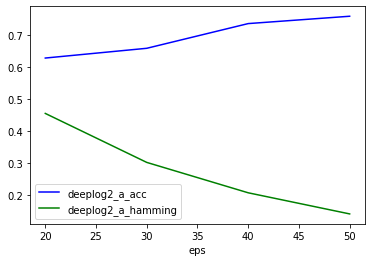

In [24]:
exps = ['deeplog2_a']
plot_lengends = []
for exp_name in exps:
    display(exp_name)
    legend = process_res(exp_name, show_tables=True)
    plot_lengends = plot_lengends + legend

plt.legend(plot_lengends)
plt.show()

'deeplog2_a'

'Ctrl Val'

,date,threshold,tn,fp,fn,tp,acc
0,1.622927e+09,0.500000,840,0,840,0,0.500000
1,1.622927e+09,-29.171588,625,215,113,727,0.804762


'Ctrl Test'

,date,threshold,tn,fp,fn,tp,acc
0,1.622927e+09,0.500000,1200,0,1200,0,0.500000
1,1.622927e+09,-29.171588,905,295,165,1035,0.808333


'Utility Val'

,date,iter,eps,threshold,tn,fp,fn,tp,acc
0,1.622940e+09,0,20,-66.436228,292,548,63,777,0.636310
1,1.622940e+09,1,30,-66.510004,327,513,50,790,0.664881
2,1.622941e+09,2,40,-37.670768,491,349,78,762,0.745833
3,1.622941e+09,3,50,-43.323731,484,356,53,787,0.756548


'Utility Test'

,date,iter,eps,threshold,tn,fp,fn,tp,acc
0,1.622940e+09,0,20,-66.436228,403,797,95,1105,0.628333
1,1.622940e+09,1,30,-66.510004,455,745,74,1126,0.658750
2,1.622941e+09,2,40,-37.670768,683,517,117,1083,0.735833
3,1.622941e+09,3,50,-43.323731,693,507,72,1128,0.758750


'Sim Test'

,date,iter,eps,metric,mean_normal,mean_abnormal,mean_all
0,1.622940e+09,0,20,hamming,0.482542,0.428489,0.455515
1,1.622940e+09,0,20,hamming_wise,9.732500,8.179167,8.955833
2,1.622940e+09,0,20,cosine,0.078741,0.073539,0.076140
3,1.622940e+09,1,30,hamming,0.319880,0.285492,0.302686
4,1.622940e+09,1,30,hamming_wise,6.378333,5.360833,5.869583
5,1.622940e+09,1,30,cosine,0.057115,0.054736,0.055925
6,1.622941e+09,2,40,hamming,0.219028,0.196713,0.207871
7,1.622941e+09,2,40,hamming_wise,4.387500,3.684167,4.035833
8,1.622941e+09,2,40,cosine,0.043244,0.042176,0.042710
9,1.622941e+09,3,50,hamming,0.154289,0.129630,0.141960


'Test acc'

,eps,acc
0,20,0.628333
1,30,0.658750
2,40,0.735833
3,50,0.758750


'All hamming'

,date,iter,eps,metric,mean_normal,mean_abnormal,mean_all
0,1.622940e+09,0,20,hamming,0.482542,0.428489,0.455515
3,1.622940e+09,1,30,hamming,0.319880,0.285492,0.302686
6,1.622941e+09,2,40,hamming,0.219028,0.196713,0.207871
9,1.622941e+09,3,50,hamming,0.154289,0.129630,0.141960


'Mean hamming'

,eps,mean_all
0,20,0.455515
3,30,0.302686
6,40,0.207871
9,50,0.141960


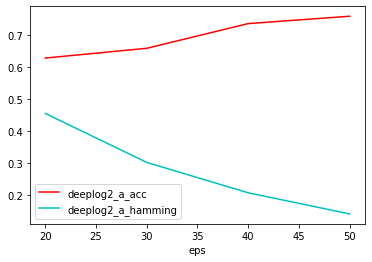

In [25]:
exps = ['deeplog2_b']
plot_lengends = []
for exp_name in exps:
    display(exp_name)
    legend = process_res(exp_name, show_tables=True)
    plot_lengends = plot_lengends + legend

plt.legend(plot_lengends)
plt.show()

'deeplog2_a'

'Ctrl Val'

,date,threshold,tn,fp,fn,tp,acc
0,1.622927e+09,0.500000,840,0,840,0,0.500000
1,1.622927e+09,-29.171588,625,215,113,727,0.804762


'Ctrl Test'

,date,threshold,tn,fp,fn,tp,acc
0,1.622927e+09,0.500000,1200,0,1200,0,0.500000
1,1.622927e+09,-29.171588,905,295,165,1035,0.808333


'Utility Val'

,date,iter,eps,threshold,tn,fp,fn,tp,acc
0,1.622940e+09,0,20,-66.436228,292,548,63,777,0.636310
1,1.622940e+09,1,30,-66.510004,327,513,50,790,0.664881
2,1.622941e+09,2,40,-37.670768,491,349,78,762,0.745833
3,1.622941e+09,3,50,-43.323731,484,356,53,787,0.756548


'Utility Test'

,date,iter,eps,threshold,tn,fp,fn,tp,acc
0,1.622940e+09,0,20,-66.436228,403,797,95,1105,0.628333
1,1.622940e+09,1,30,-66.510004,455,745,74,1126,0.658750
2,1.622941e+09,2,40,-37.670768,683,517,117,1083,0.735833
3,1.622941e+09,3,50,-43.323731,693,507,72,1128,0.758750


'Sim Test'

,date,iter,eps,metric,mean_normal,mean_abnormal,mean_all
0,1.622940e+09,0,20,hamming,0.482542,0.428489,0.455515
1,1.622940e+09,0,20,hamming_wise,9.732500,8.179167,8.955833
2,1.622940e+09,0,20,cosine,0.078741,0.073539,0.076140
3,1.622940e+09,1,30,hamming,0.319880,0.285492,0.302686
4,1.622940e+09,1,30,hamming_wise,6.378333,5.360833,5.869583
5,1.622940e+09,1,30,cosine,0.057115,0.054736,0.055925
6,1.622941e+09,2,40,hamming,0.219028,0.196713,0.207871
7,1.622941e+09,2,40,hamming_wise,4.387500,3.684167,4.035833
8,1.622941e+09,2,40,cosine,0.043244,0.042176,0.042710
9,1.622941e+09,3,50,hamming,0.154289,0.129630,0.141960


'Test acc'

,eps,acc
0,20,0.628333
1,30,0.658750
2,40,0.735833
3,50,0.758750


'All hamming'

,date,iter,eps,metric,mean_normal,mean_abnormal,mean_all
0,1.622940e+09,0,20,hamming,0.482542,0.428489,0.455515
3,1.622940e+09,1,30,hamming,0.319880,0.285492,0.302686
6,1.622941e+09,2,40,hamming,0.219028,0.196713,0.207871
9,1.622941e+09,3,50,hamming,0.154289,0.129630,0.141960


'Mean hamming'

,eps,mean_all
0,20,0.455515
3,30,0.302686
6,40,0.207871
9,50,0.141960


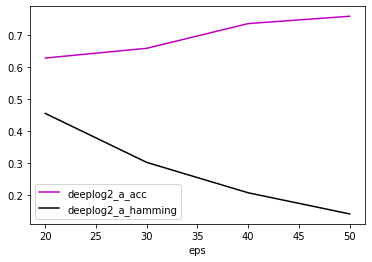

In [26]:
exps = ['deeplog2_c']
plot_lengends = []
for exp_name in exps:
    display(exp_name)
    legend = process_res(exp_name, show_tables=True)
    plot_lengends = plot_lengends + legend

plt.legend(plot_lengends)
plt.show()